In [ ]:
!pip install tensorflow==2.1.0 

In [1]:
import tensorflow as tf

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Load the dataset**

In [4]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)= mnist.load_data()

In [5]:
X_test.shape

(10000, 28, 28)

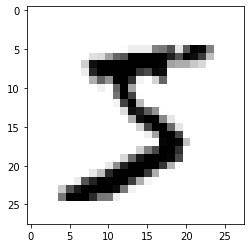

In [6]:
plt.imshow(X_train[0],cmap= plt.cm.binary)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train= tf.keras.utils.normalize(X_train,axis=1)
X_test= tf.keras.utils.normalize(X_test,axis=1)

**Define the model architecture**

In [9]:
model= tf.keras.models.Sequential() # feed forward netwrok
model.add(tf.keras.layers.Flatten()) # to flatten the input 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #dense layer with 128 neurons
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #output layer with 10 classes

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #defining the model params

**Train the model**

In [11]:
model.fit(X_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2609 - accuracy: 0.9228
Epoch 2/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.1066 - accuracy: 0.9676
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0710 - accuracy: 0.9777
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0529 - accuracy: 0.9833
Epoch 5/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0416 - accuracy: 0.9864


In [12]:
val_loss,val_acc= model.evaluate(X_test,y_test) #to check for overfitting

10000/10000 [==============================] - 1s 57us/sample - loss: 0.0805 - accuracy: 0.9774


In [13]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

**Predictions**

In [14]:
predictions= model.predict([X_test])

In [15]:
predictions #contains probabilities for each class

array([[4.8799575e-10, 3.3175532e-08, 1.4079990e-07, ..., 9.9996519e-01,
        7.9654650e-10, 4.7046365e-07],
       [6.4272317e-11, 1.3037439e-03, 9.9868435e-01, ..., 9.8938626e-09,
        1.5442873e-07, 3.1177535e-12],
       [5.7483001e-09, 9.9984527e-01, 1.1362190e-06, ..., 4.2386888e-05,
        9.9577519e-05, 4.6912074e-08],
       ...,
       [8.4818534e-11, 3.1773268e-09, 1.9383557e-10, ..., 9.9822262e-07,
        7.9715178e-08, 7.2505507e-05],
       [8.7582670e-09, 3.4925286e-08, 3.1865560e-10, ..., 1.0615361e-09,
        3.0528571e-04, 2.5759866e-11],
       [9.7306274e-10, 7.3050984e-12, 9.6754440e-13, ..., 2.7668236e-15,
        1.2606613e-10, 1.3444988e-13]], dtype=float32)

In [16]:
print(np.argmax(predictions[0]))

7


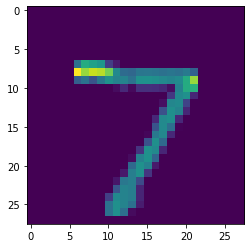

In [17]:
plt.imshow(X_test[0])